In [1]:
import gym
import numpy as np
import Pendulum_Policy_Gradient
import matplotlib.pyplot as plt

In [2]:
def test(agent,env,render = False):
    state = env.reset()

    r = 0

    done = False

    while not done:
        action = agent.get_action(state)
        new_state,reward,done,_ = env.step(action)

        if render == True:
            env.render()

        state = new_state

        r += reward


        # print(done)

        # env.render(state)

    env.close()

    print("\n"+str(r))

In [3]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]),ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)


def plotting(returns,window_size = 100):
    averaged_returns = np.zeros(len(returns)-window_size+1)
    max_returns = np.zeros(len(returns)-window_size+1)
    min_returns = np.zeros(len(returns)-window_size+1)
    
    
    for i in range(len(averaged_returns)):
        averaged_returns[i] = np.mean(returns[i:i+window_size])
        max_returns[i] = np.max(returns[i:i+window_size])
        min_returns[i] = np.min(returns[i:i+window_size])
    
#     plt.plot(averaged_returns)
    
#     plot_mean_and_CI(averaged_returns,min_returns,max_returns,'g--','g')
    
    return (averaged_returns,max_returns,min_returns)

In [4]:
env = gym.make('Pendulum-v0')

### Vanilla Policy Gradient and Gaussian Policy

### Vanilla Policy Gradient Without Baseline

In [6]:
agent_VPG_without_baseline = Pendulum_Policy_Gradient.Pendulum_Agent(env)
reward_history = agent_VPG_without_baseline.train(max_episodes = 3000,baseline = False)

Episode: 0, Episode Reward: tensor([-1625.0742]), Average Reward: nan

/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Vanilla_Policy_Gradient_Continuous. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: C

Episode: 2900, Episode Reward: tensor([-1511.9037]), Average Reward: -1415.3808593756875

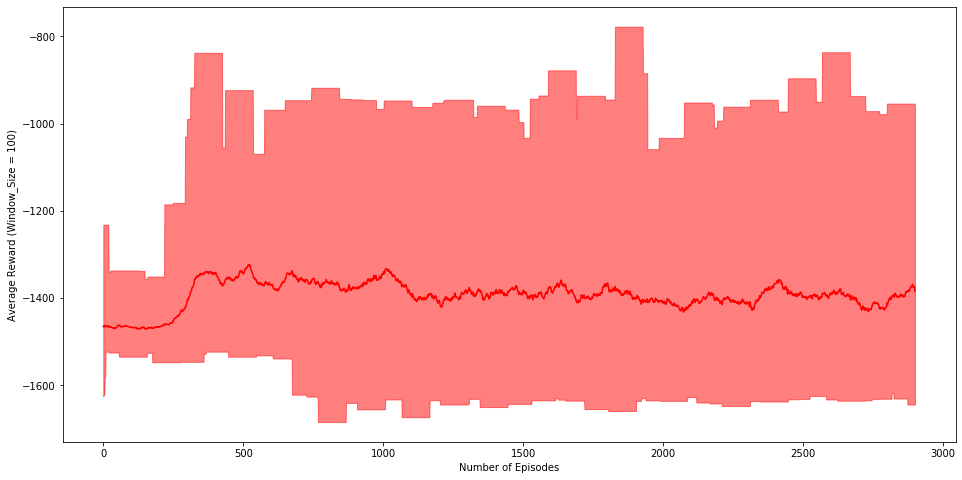

In [7]:
window_size = 100
average, min_returns, max_returns = plotting(reward_history,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

In [9]:
for i in range(10):
    test(agent_VPG_without_baseline,env,False)

/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



tensor([[-1167.2880]])

tensor([[-1534.8342]])

tensor([[-1278.7091]])

tensor([[-1459.8221]])

tensor([[-1194.9161]])

tensor([[-1470.1033]])

tensor([[-1216.3058]])

tensor([[-1606.4878]])

tensor([[-1532.7941]])

tensor([[-1113.4672]])


In [ ]:
print(np.var(agent_VPG_without_baseline.var_reward))

### Vanilla Policy Gradient with Baseline

In [11]:
agent_VPG_with_baseline = Pendulum_Policy_Gradient.Pendulum_Agent(env)
reward_history = agent_VPG_with_baseline.train(max_episodes = 1000,baseline = True)

Episode: 0, Episode Reward: tensor([-1123.6539]), Average Reward: nan

/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Vanilla_Policy_Gradient_Continuous. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: C

Episode: 900, Episode Reward: tensor([-1528.9364]), Average Reward: -1411.9954833984375

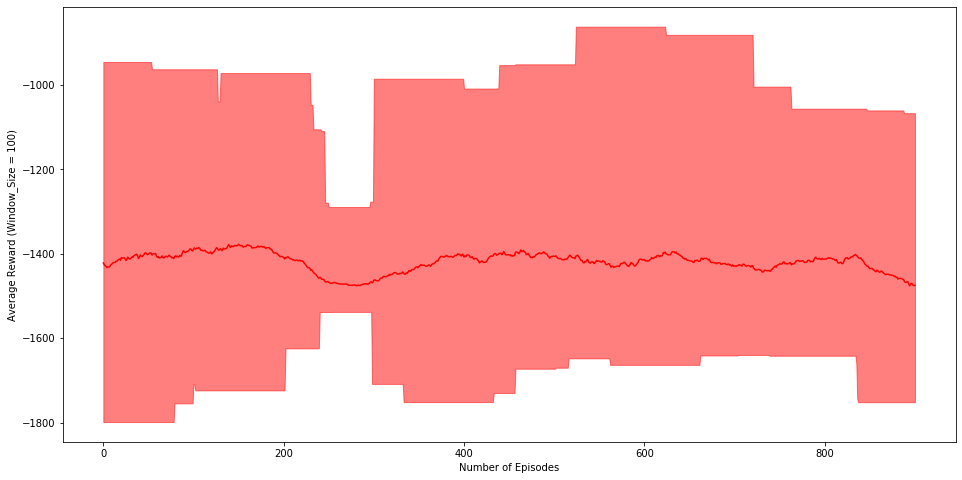

In [12]:
window_size = 100
average, min_returns, max_returns = plotting(reward_history,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

In [13]:
for i in range(10):
    test(agent_VPG_with_baseline,env,False)


tensor([[-1488.3129]])

tensor([[-1645.6459]])

tensor([[-1517.6008]])

tensor([[-1663.0939]])

tensor([[-1522.0848]])

tensor([[-1501.9562]])

tensor([[-1511.7993]])

tensor([[-1078.1012]])

tensor([[-1620.5525]])

tensor([[-1528.6173]])


In [14]:
print(agent_VPG_with_baseline.var_reward)

[tensor([-309.1865, -310.7783, -312.1893, -313.0475, -313.2376, -312.5337,
        -310.8254, -308.1839, -304.3310, -299.1458, -294.9023, -291.6791,
        -289.6956, -288.8322, -288.8321, -289.5588, -290.8074, -292.4487,
        -294.2533, -295.8826, -296.9983, -297.5854, -297.5444, -296.6485,
        -294.6564, -291.1894, -286.6247, -281.2326, -276.8420, -273.5887,
        -271.3746, -269.9962, -269.4618, -269.7702, -270.6105, -271.9084,
        -273.4200, -274.8384, -275.8123, -276.3093, -276.0631, -275.0087,
        -272.8980, -269.2260, -263.8162, -257.4705, -252.1775, -248.0311,
        -245.3178, -243.6991, -243.2269, -243.7510, -245.0431, -246.9852,
        -249.2926, -251.6185, -253.6855, -255.2055, -255.6895, -254.9800,
        -252.7523, -248.4474, -242.5283, -234.4628, -227.8506, -222.7084,
        -218.8912, -216.3066, -215.0282, -214.8311, -215.6999, -217.2231,
        -219.2799, -221.7213, -224.4527, -227.2815, -229.9836, -232.1959,
        -233.5526, -233.6865, -232.27

### Actor-Critic Method for Pendulum-V0

In [16]:
agent = Pendulum_Policy_Gradient.DDPG(env,learning_rate=1e-4)

In [17]:
reward_history = agent.train(max_timesteps=2e4)

Episode: 100, Episode Reward: -899.9636436210004, Average Reward: -1219.3672169083736

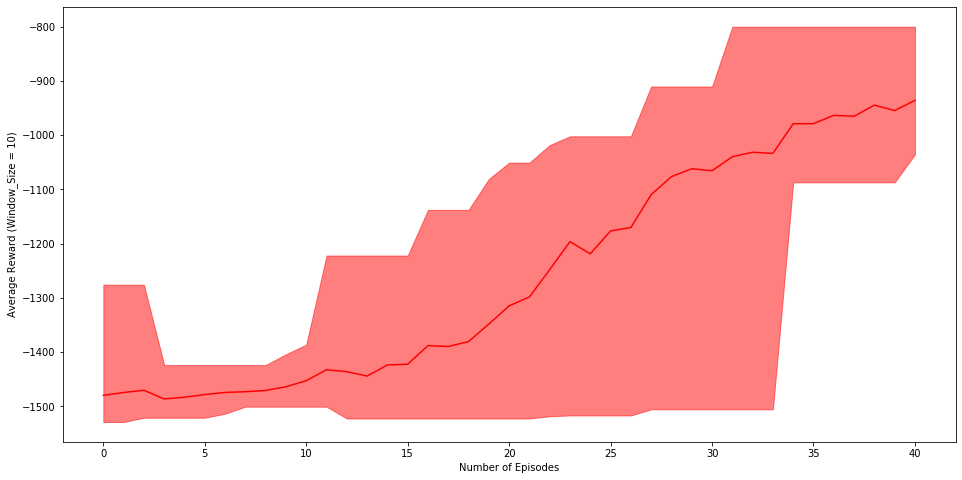

In [19]:
reward_history = reward_history[50:]
window_size = 10
average, min_returns, max_returns = plotting(reward_history,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

In [24]:
for i in range(10):
    test(agent,env,True)


-930.593195323719

-809.3018877884643

-745.8010489870016

-799.1301556944529

-1492.7088130473155

-935.8846981618252

-817.9182552552426

-911.3494845155589

-934.3364204950291

-819.4428127181467


In [23]:
test(agent,env,True)


-872.1450124240332
